# **Importação de Bibliotecas e Arquivos de Configuração**

In [1]:
import config
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt


In [2]:
%matplotlib inline
#!pip install plotly

# **Carregamento das Bases de Dados**

In [176]:
atlantico_norte = pd.read_excel(config.URL_ATLA_N)
atlantico_norte.rename(columns=atlantico_norte.iloc[0], inplace=True)
atlantico_norte = atlantico_norte.drop(atlantico_norte.index[0])
atlantico_norte.columns = ['Data','1','2', '3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19']

atlantico_sul = pd.read_excel(config.URL_ATLA_S)
atlantico_sul.rename(columns=atlantico_sul.iloc[0], inplace=True)
atlantico_sul = atlantico_sul.drop(atlantico_sul.index[0])
atlantico_sul.columns = ['Data','1','2', '3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19', 
                           '20','21','22','23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
                           '37', '38', '39']

pacifico_sul = pd.read_excel(config.URL_PAC_S)
pacifico_sul.rename(columns=pacifico_sul.iloc[0], inplace=True)
pacifico_sul = pacifico_sul.drop(pacifico_sul.index[0])
pacifico_sul.columns = ['Data','1','2', '3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19', 
                           '20','21','22','23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34']

nino = pd.read_excel(config.URL_NINO)

precipitacao_mensal = pd.read_excel(config.URL_PRP_MENSAL)
precipitacao_mensal.rename(columns=precipitacao_mensal.iloc[0], inplace=True)
precipitacao_mensal = precipitacao_mensal.drop(precipitacao_mensal.index[0])
precipitacao_mensal.columns = ['Data','1','2', '3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19', 
                               '20','21','22','23', '24']

areas_maraba = ['5', '6', '8', '9','10','11','12','13','14','15','16','17','18','19']

In [175]:
precipitacao_mensal.head()

,Data,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
1,1979-01-01,260.4260,262.8780,311.196,407.0530,434.7510,412.344,250.7360,263.2670,307.101,...,275.8620,329.2660,326.1580,330.7400,268.4920,253.3310,251.5130,274.5150,276.3410,287.5730
2,1979-02-01,224.9270,235.0270,273.428,313.8070,328.5720,366.901,231.8990,227.4150,237.367,...,199.1050,225.0890,235.4290,322.3820,172.4840,185.5000,188.7800,267.8620,304.7010,315.1980
3,1979-03-01,257.3640,253.0860,228.587,198.8930,180.7950,164.735,229.0530,240.0590,215.087,...,181.8330,152.6880,136.8050,132.7360,141.4420,156.8230,168.4040,188.3320,155.6980,138.5600
4,1979-04-01,180.8470,182.5740,194.952,242.9050,263.4900,253.569,181.3290,189.5600,196.719,...,199.0620,179.1340,163.1920,164.9270,245.9010,245.5120,220.5310,175.8920,151.1550,149.1660
5,1979-05-01,85.2109,93.3579,101.294,91.2052,70.8223,48.713,82.8867,84.5657,75.038,...,64.7058,29.0629,18.9035,20.4924,91.6827,89.9316,69.8226,36.3388,29.9488,27.7141


Abordagem 1:

Criar dataframe com as medições de temperatura nas respectivas áreas de maraba para cada oceano.

In [52]:
dataframes = {}


for r in areas_maraba:
    dataframes['area_'+r] = pd.DataFrame({
        'DATA': atlantico_norte['Data'],
        'ATL_N_'+r: atlantico_norte[r],
        'ATL_S_'+r: atlantico_sul[r],
        'PAC_S_'+r: pacifico_sul[r],
        'PRP_MENSAL_'+r: precipitacao_mensal[r]}).dropna()

dataframes.keys()
## 5_AT_N  5_ATL_S  5_PACIFICO_SUL PRECIPITA

dict_keys(['area_5', 'area_6', 'area_8', 'area_9', 'area_10', 'area_11', 'area_12', 'area_13', 'area_14', 'area_15', 'area_16', 'area_17', 'area_18', 'area_19'])

In [86]:
def plot_histgram(area: str, bins):
    s = area.split('_')[1]
    figure = plt.figure(figsize=(15,5))
    st = figure.suptitle("Área "+s)
    
    ax1 = figure.add_subplot(141)
    ax1 = sb.histplot(dataframes[area]['ATL_N_'+s], bins=bins, kde=True)
    ax1.set_title('Atlântico Norte')
    
    ax2 = figure.add_subplot(142)
    ax2 = sb.histplot(dataframes[area]['ATL_S_'+s], bins=bins, kde=True)
    ax2.set_title('Atlântico Sul')
    
    ax3 = figure.add_subplot(143)
    ax3 = sb.histplot(dataframes[area]['PAC_S_'+s], bins=bins, kde=True)
    ax3.set_title('Pacífico Sul')
    
    ax4 = figure.add_subplot(144)
    ax4 = sb.histplot(dataframes[area]['PRP_MENSAL_'+s], bins=bins, kde=True)
    ax4.set_title('Precipitação Mensal')
    figure.tight_layout()
    st.set_y(0.95)
    figure.subplots_adjust(top=0.85)
    plt.show()
 

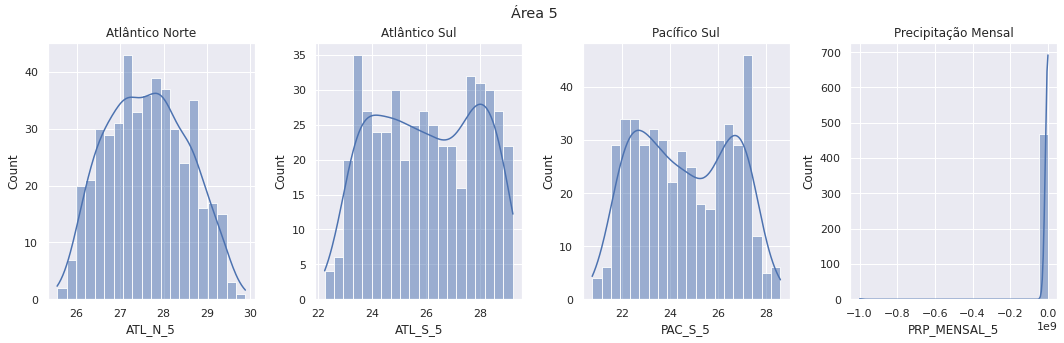

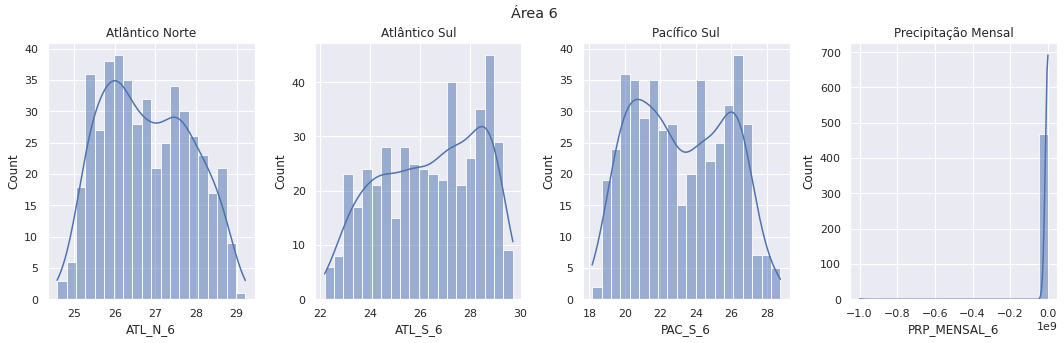

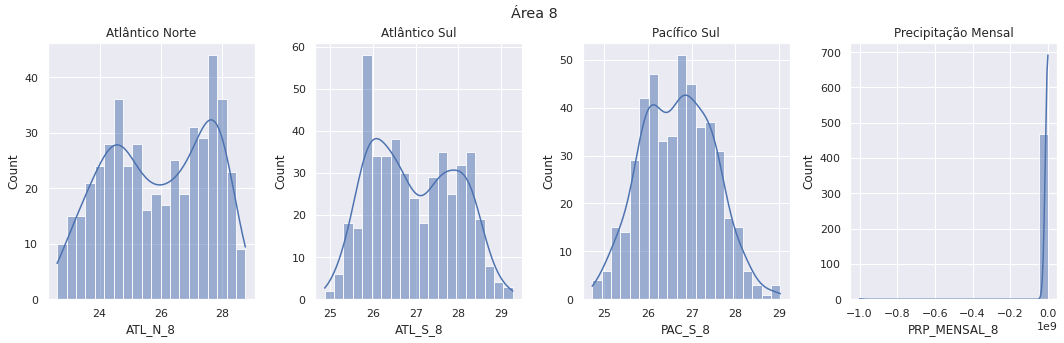

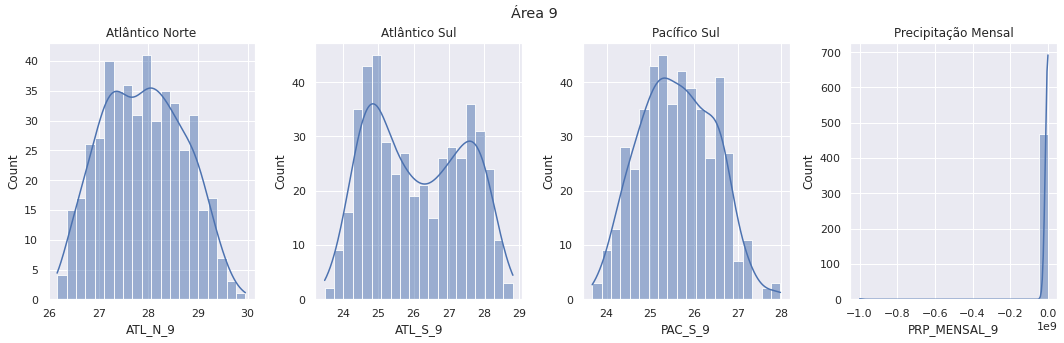

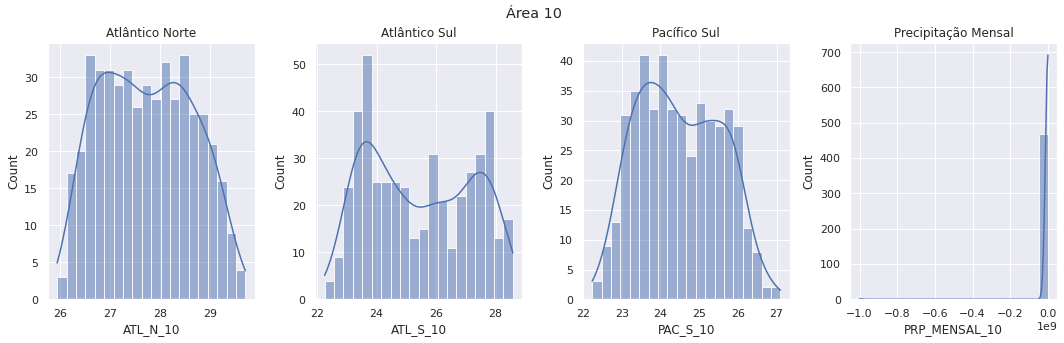

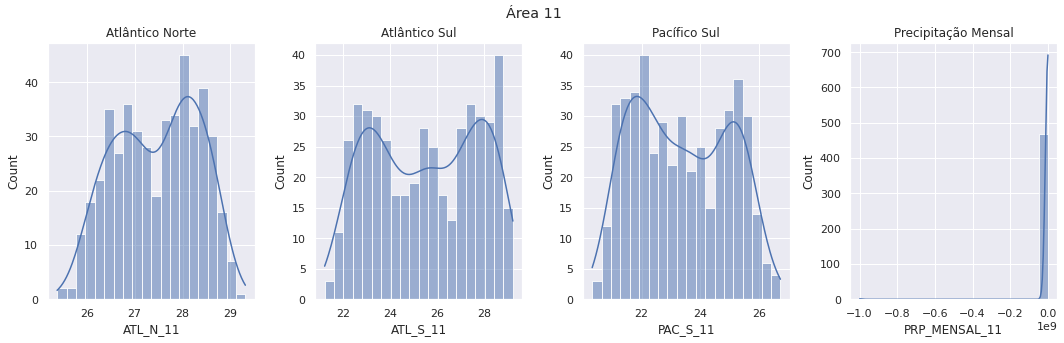

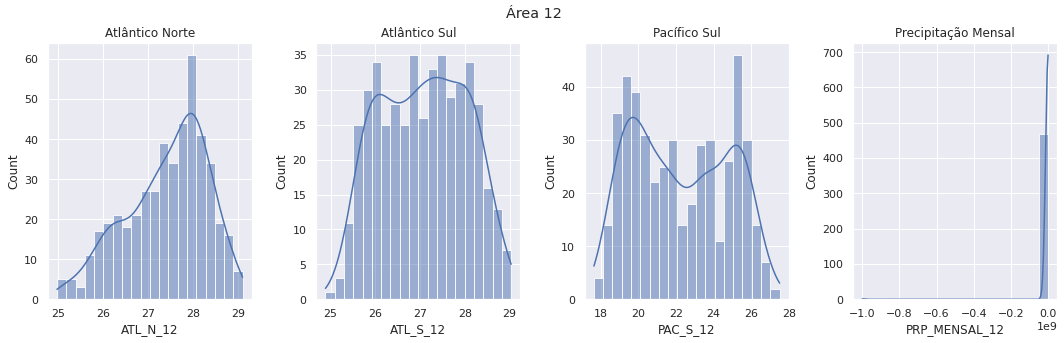

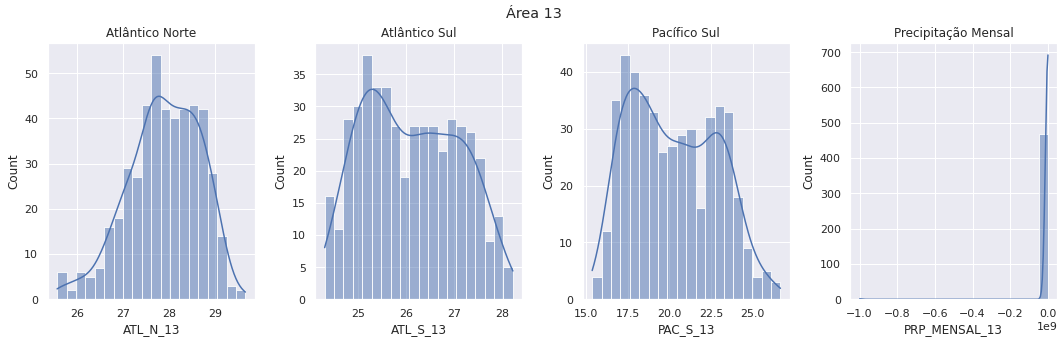

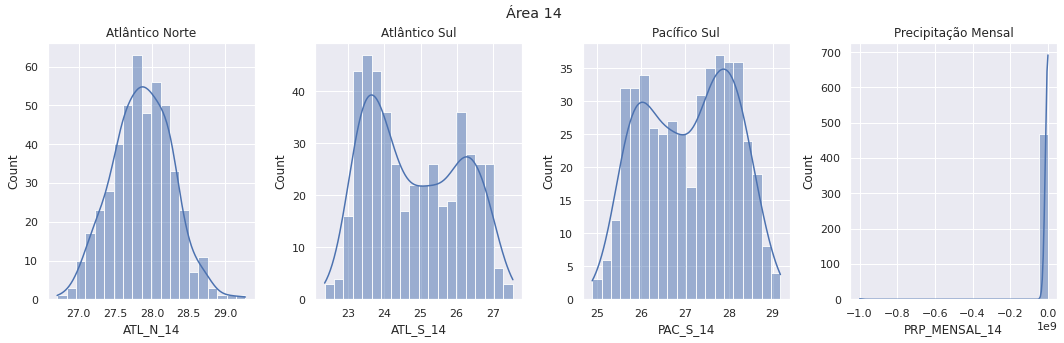

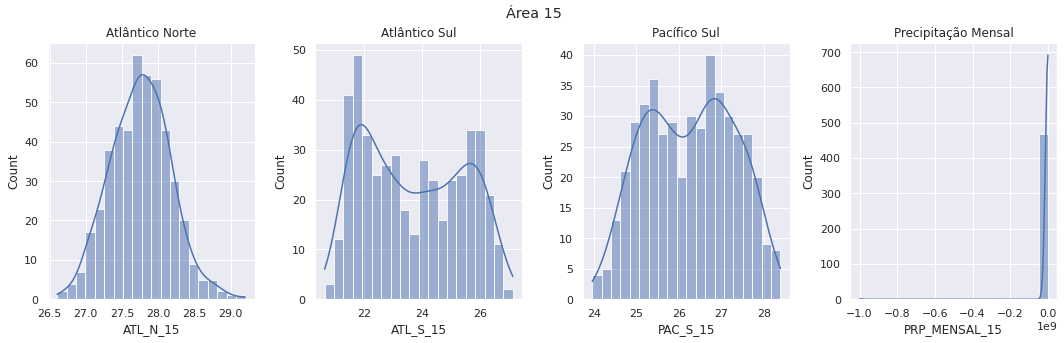

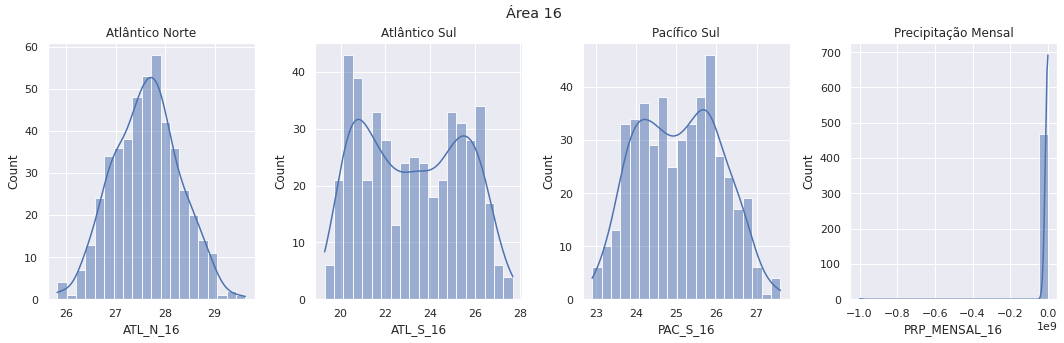

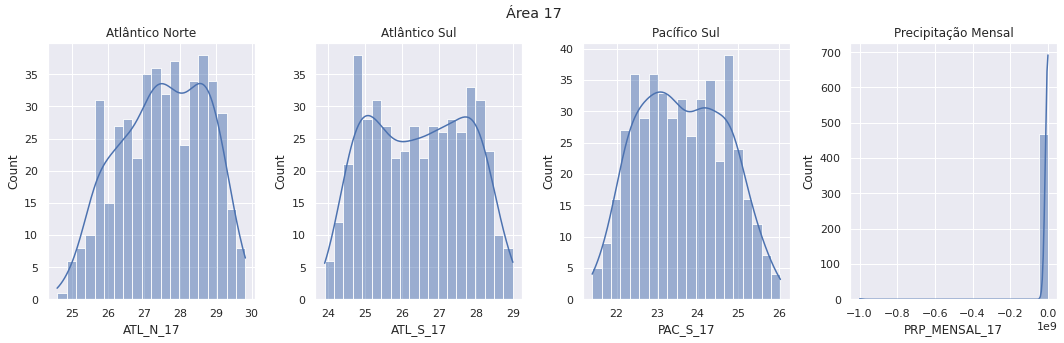

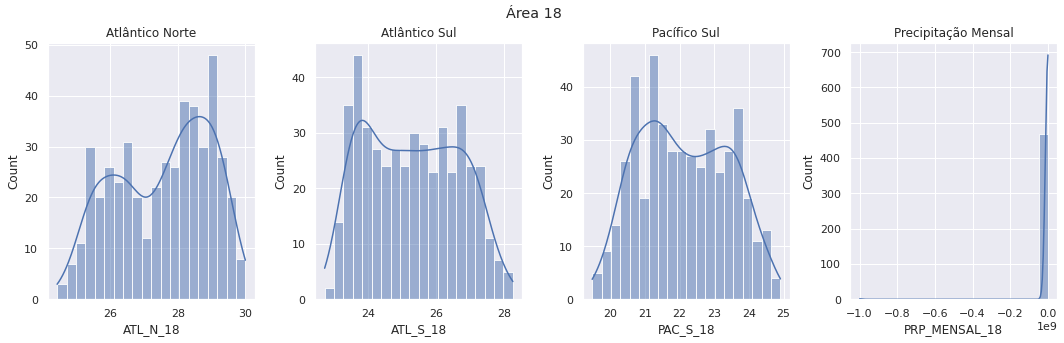

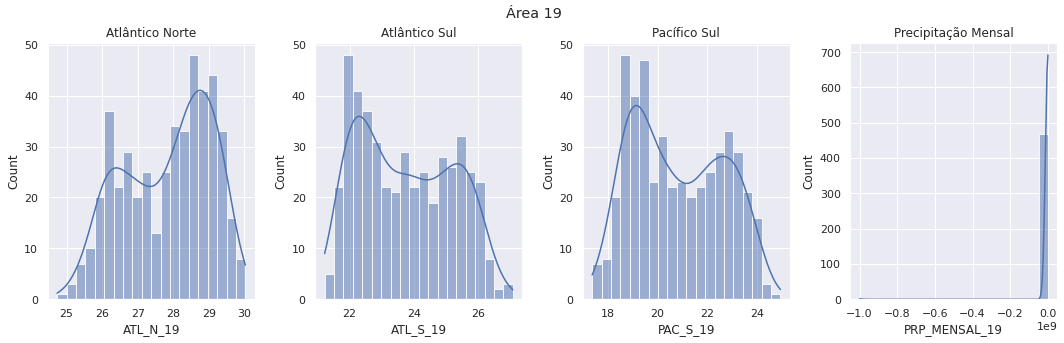

In [87]:
for r in dataframes.keys():
    plot_histgram(r,20)

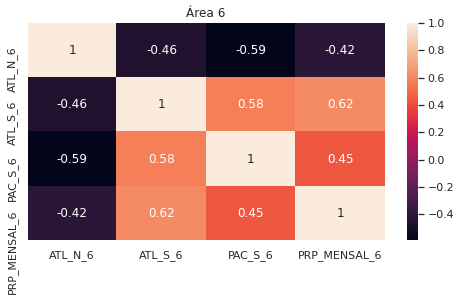

In [194]:
#'area_5', 'area_6', 'area_8', 'area_9', 'area_10', 'area_11', 'area_12', 'area_13', 
#'area_14', 'area_15', 'area_16', 'area_17', 'area_18', 'area_19'

area = 'area_6'
sb.heatmap(dataframes[area].corr(method='kendall'), annot=True)
plt.title('Área '+area.split('_')[1])


plt.show()


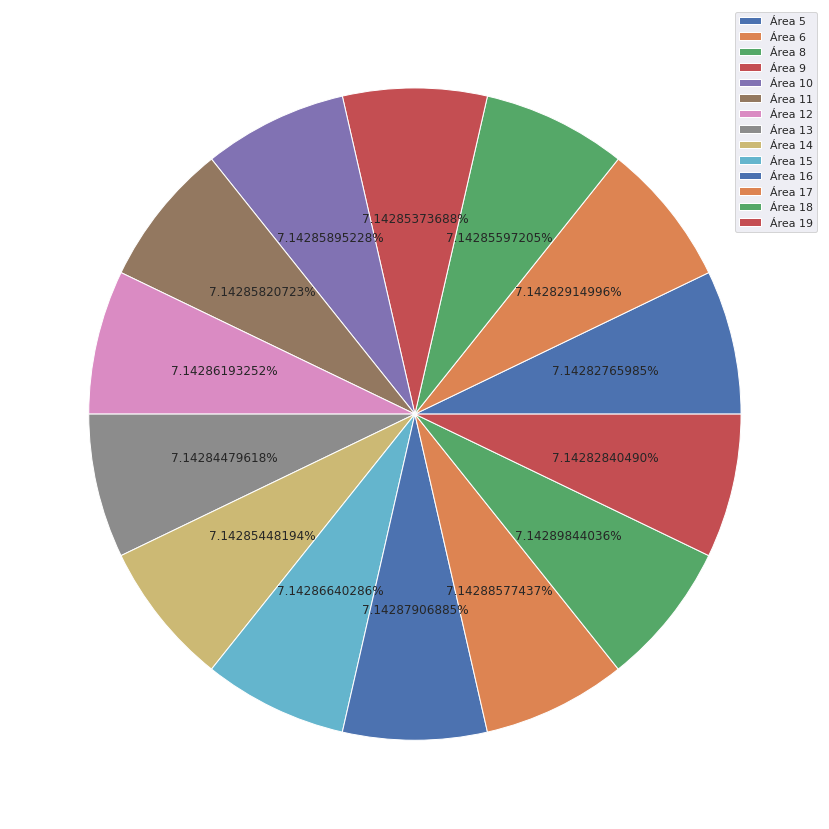

In [191]:
data_medias = {}

for r in dataframes.keys():
    s = r.split('_')[1]
    data_medias[r] = pd.DataFrame({
        'ATL_N_'+s: [np.mean(dataframes[r]['ATL_N_'+s])],
        'ATL_S_'+s: [np.mean(dataframes[r]['ATL_S_'+s])],
        'PAC_S_'+s: [np.mean(dataframes[r]['PAC_S_'+s])],
        'PRP_MENSAL_'+s: [abs(np.mean(dataframes[r]['PRP_MENSAL_'+s]))]
    })

x = []
y = []
for r in data_medias.keys():
    x.append('Área '+r.split('_')[1])
    y.append(data_medias[r]['PRP_MENSAL_'+r.split('_')[1]].values[0])
    
plt.figure(figsize=(15,15))
plt.pie(y, autopct='%1.11f%%')
plt.legend(x)
plt.show()